In [1]:
%load_ext autoreload 
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

# KDE related 

## Split violin 

In [24]:
s1 = np.random.permutation(np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30)))
s2 = np.repeat(['Basal-like', "Classical"], (57, 133))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip((2, -2) , (57, 133)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1, "s2" : s2})

In [4]:
len(data['s1'].astype('category').cat.categories)

4

In [5]:
from cbviz.cbviz.KDE import SplitViolin

In [33]:
sp = SplitViolin(data, s1_order=['WT', 'Balanced', 'Minor', 'Major'], s2_order=['Classical', 'Basal-like'])

ValueError: DataFrame needs three columns, dtypes allowed are: float - object|category - object|category

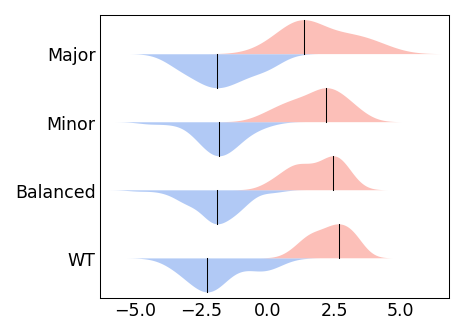

In [28]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in sp.get_violins(colors=('cornflowerblue', 'salmon')):

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.5)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.5, c='k')

ax.set_yticks(*sp.get_s1_ticks())

# fig.savefig('./test/Test-SplitViolin.pdf')

## Ridge plot

In [49]:
s1 = np.repeat(['WT', 'Balanced', 'Minor', 'Major'], (30, 80, 50, 30))
x = [y for x in [np.random.normal(loc=i, size=s) for i, s in zip(range(4) , (30, 80, 50, 30)) ] for y in x]

data = pd.DataFrame({"x" : x, "s1" : s1})
data

,x,s1
0,1.286023,WT
1,-1.207937,WT
2,-0.637252,WT
3,-0.585386,WT
4,-0.110654,WT
...,...,...
185,3.406423,Major
186,3.726015,Major
187,4.186788,Major
188,2.624377,Major


In [36]:
from cbviz.cbviz.KDE import Ridge

In [73]:
rp = Ridge(data, s1_order=['WT','Balanced', 'Minor', 'Major'], scale_factor=0.8)

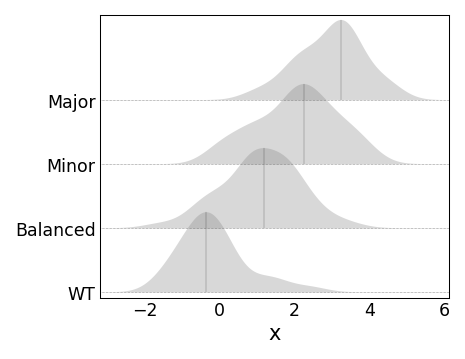

In [77]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,2.5))

for kde in rp.get_kdes():

    ax.fill_betweenx(kde.density, kde.grid, facecolor=kde.color, alpha=0.3)
    ax.plot(kde.mode.ycoords, kde.mode.xcoords, lw=0.1, c='k')

ax.set_yticks(*rp.get_s1_ticks())
ax.set_xlabel(rp.ylabel)
[ax.axhline(i, ls=':', lw=0.25, c='0.15') for i in rp.get_s1_ticks()[0]]

# XYview

The base class implementing scatter plot, pearson correlation, a regression line and a line representing slope 1

In [20]:
metabolites = ['L-Cystine', 'Cysteine', 'NADH']

In [21]:
all = pd.read_csv('./Metabolite-logFC-Signatures.csv', index_col=0)
df = all.iloc[:, [0,2]].copy()
df

,ARNTL2KO_FG,FG_effect
metabolite,,
2-2-Dimethyl Succinic acid,0.148329,0.803089
2-3-Dihydroxybenzoic acid,0.470715,0.575968
2-3-Dihydroxyisovalerate,0.393554,-0.012348
2-3-Pyridinedicarboxylic acid,-0.701599,-0.141486
2-4-Quinolinediol,-0.172184,-0.243374
...,...,...
o-Phospho-L-Serine,6.490183,-0.781902
trans-4-Hydroxy-L-proline,0.170155,-0.536262
trans-Aconitic acid,-0.228860,-0.048490


In [22]:
from cbviz.cbviz.XYtools import XYview
from adjustText import adjust_text

In [69]:
cond = df.index.isin(metabolites)
xv = XYview(df, highlight=metabolites, pearson_label_kw={'fontsize':'small'}, s=np.where(cond, 40, 10), c=df.mean(1).values, cmap=plt.cm.RdBu_r)

TypeError: 'list' object is not callable

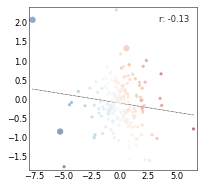

In [71]:
plt.style.use('cviz')
fig, ax = plt.subplots(figsize=(3,3))

ax.scatter(xv.x, xv.y, **xv.scatter_kw)
ax.add_artist(xv.get_reg_line())
ax.legend(*xv.get_pearson_label(), **xv.pearson_label_props)
txts = [ax.text(*txt, fontsize='x-small') for txt in xv.label_dots()]
# adjust_text(txts)

fig.savefig('./test/Test-XYview.pdf')

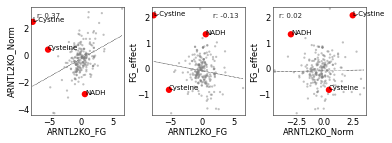

In [136]:
from itertools import combinations

fig, axs = plt.subplots(ncols=3, figsize=(6, 2), gridspec_kw={'wspace':0.3})

cond = all.index.isin(metabolites)

for combo, ax in zip(combinations(all.columns.to_list(), 2), axs.flat):

    xv = XYview(all[list(combo)], highlight=metabolites, s=np.where(cond, 40, 5), c=np.where(cond, 'r', '0.5'), alpha=np.where(cond, 1.0, 0.5))

    ax.scatter(xv.x, xv.y, **xv.scatter_kw)
    ax.add_artist(xv.reg_line)
    ax.legend(*xv.pearson_label, **xv.pearson_label_props)
    txts = [ax.text(*txt, fontsize='x-small') for  txt in xv.highlight]
    ax.set_xlabel(xv.xlabel, labelpad=0.5)
    ax.set_ylabel(xv.ylabel, labelpad=0.5)

fig.savefig('./test/Test-XYview-Multi.pdf')